# U.S. Treasury Yield Spread
<br>
This repo contains the U.S. Treasury Yield Spread project as part of my data science portfolio. The objective of this project is to visualize the US Treasury Yield Spread chart using data downloaded from the US Department of The Treasury website.

1. [Problem Statement](#ps)
2. [Dataset](#data)
3. [Yield Spreads Visualization](#ys)
4. [Discussion and Conclusion](#conclusion)


---
# <a name="ps">Problem Statement</a>

### What is a Yield Spread?
According to [Investopedia](https://www.investopedia.com/terms/y/yieldspread.asp), yield spread is the difference between yields on differing debt instruments of varying maturities, credit ratings and risk, calculated by deducting the yield of one instrument from another. For example, if the two-year U.S. Treasury note is at 3% and the 10-year Treasury bond is at 5%, the yield spread between the two debt instruments is 2 percentage points, or 200 basis points. Typically, the higher risk a bond or asset class carries, the higher its yield spread. For example, a bond issued by a large, financially healthy company typically trades at a relatively low spread in relation to U.S. Treasuries. In contrast, bonds issued in emerging markets and developed markets, typically trades at a higher spread relative to U.S. Treasuries. Because bond yields are often changing, yield spreads are as well. The direction of the spread may increase or widen. When compared to the historical trend, yield spreads between U.S. Treasuries of different maturities may indicate how investors are viewing economic conditions. Widening spreads typically lead to a positive yield curve, indicating stable economic conditions in the future. Conversely, when falling spreads contract, worsening economic conditions may be coming, resulting in a flattening of the yield curve.

### What is an Inverted Yield Curve?
An inverted yield curve is an interest rate environment in which long-term debt instruments have a lower yield than short-term debt instruments of the same credit quality. This type of yield curve is the rarest of the three main curve types and is considered to be a predictor of economic recession.  An inverted yield curve is sometimes referred to as a negative yield curve. Historically, inversions of the yield curve have preceded many of the U.S. recessions. Due to this historical correlation, the yield curve is often seen as an accurate forecast of the turning points of the business cycle. A recent example is when the U.S. Treasury yield curve inverted in late 2005, 2006, and again in 2007 before U.S. equity markets collapsed. An inverse yield curve predicts lower interest rates in the future as longer-term bonds are demanded, sending the yields down. One of the most popular spreads to watch across Wall Street is that between the 2-year Treasury yield and the 10-year Treasury yield, i.e. "10yr-2yr" Yield Spread. Another increasingly popular spread is that between 3-month Treasury yield and the 10-year Treasury yield, i.e. "10yr-3mo" Yield Spread.

The U.S. Treasury yield curve rates data is available from the [U.S. Department of The Treasury website](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield). The 10yr-2yr yield spread chart is available from the [Federal Reserve Economic Data (FRED) website](https://fred.stlouisfed.org/series/T10Y2Y). In this project, we will visualize the yield spread chart using data downloaded from the U.S. Department of The Treasury. We will plot both the 10yr-2yr and 10yr-3mo yield spreads charts.


Below is the 10yr-2yr yield spread chart at the FRED website:
<table><tr><td><img src="fred.png"></td></tr></table>

---
# <a name="data">Dataset</a>

The U.S. Treasury yield curve rates data is downloaded from the [U.S. Department of The Treasury website](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield). Currently, the data available is from the year 1990 to 2019. The Treasury series available are 1 mo, 2 mo, 3 mo, 6 mo, 1 yr, 2 yr, 3 yr, 5 yr, 7 yr, 10 yr, 20 yr, 30 yr, although the data is dependent upon the availability of the series. In this project, we will use the 3 mo, 2 yr and 10 yr series yield data.

---
# <a name="ys">Yield Spreads Visualization</a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import datetime

# to plot within notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# personal preference
pd.set_option("display.expand_frame_repr", False)

import seaborn as sns
print(sns.__version__)

0.9.0


In [2]:
# read the raw data
data = pd.read_excel("treasury_yields.xlsx", na_values=["-"], parse_dates=True)

# make a copy of the original data
df = data.copy()

# see the data
df.head()

,Test,Test.1,Test.2,Test.3,Test.4,Test.5,Test.6,Test.7,Date,1 mo,...,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,1990-02-01 00:00:00,OK,1990-02-01,1,2,NaN,1990,1990/1/2,1990/1/2,NaN,...,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-03-01 00:00:00,OK,1990-03-01,1,3,NaN,1990,1990/1/3,1990/1/3,NaN,...,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-04-01 00:00:00,OK,1990-04-01,1,4,NaN,1990,1990/1/4,1990/1/4,NaN,...,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-05-01 00:00:00,OK,1990-05-01,1,5,NaN,1990,1990/1/5,1990/1/5,NaN,...,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-08-01 00:00:00,OK,1990-08-01,1,8,NaN,1990,1990/1/8,1990/1/8,NaN,...,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [3]:
# drop unwanted columns
df.drop(["Test","Test.1","Test.2","Test.3","Test.4","Test.5","Test.6","Test.7"], axis=1, inplace=True)
df.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,1990/1/2,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990/1/3,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990/1/4,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990/1/5,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990/1/8,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [4]:
# see the summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7946 entries, 0 to 7945
Data columns (total 13 columns):
Date     7946 non-null object
1 mo     5046 non-null float64
2 mo     741 non-null float64
3 mo     7942 non-null float64
6 mo     7945 non-null float64
1 yr     7945 non-null float64
2 yr     7945 non-null float64
3 yr     7945 non-null float64
5 yr     7945 non-null float64
7 yr     7945 non-null float64
10 yr    7945 non-null float64
20 yr    7006 non-null float64
30 yr    6951 non-null float64
dtypes: float64(12), object(1)
memory usage: 807.1+ KB


In [5]:
# METHOD 1
# convert the Date column into the correct format
# df["Date"] =  df["Date"].astype(str)
# df["Date"] =  pd.to_datetime(df["Date"], format="%Y-%d-%m")
# df["Date"]

In [6]:
# METHOD 2
# convert the Date column into the correct format
df["Date"] = pd.to_datetime(df["Date"])

# df["Date"] = df["Date"].apply(lambda x: datetime.datetime.strftime(x, "%Y-%d-%m"))
# if want to convert the time
# df["Date"].apply(lambda x: datetime.datetime.strftime(x, "%Y-%d-%m %H:%M:%S"))

# check the format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7946 entries, 0 to 7945
Data columns (total 13 columns):
Date     7946 non-null datetime64[ns]
1 mo     5046 non-null float64
2 mo     741 non-null float64
3 mo     7942 non-null float64
6 mo     7945 non-null float64
1 yr     7945 non-null float64
2 yr     7945 non-null float64
3 yr     7945 non-null float64
5 yr     7945 non-null float64
7 yr     7945 non-null float64
10 yr    7945 non-null float64
20 yr    7006 non-null float64
30 yr    6951 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 807.1 KB


In [7]:
# check the first 10 rows
df.head(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
5,1990-01-09,NaN,NaN,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10
6,1990-01-10,NaN,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11
7,1990-01-11,NaN,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
8,1990-01-12,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17
9,1990-01-16,NaN,NaN,7.89,7.99,7.92,8.10,8.13,8.11,8.18,8.20,NaN,8.25


In [8]:
# check the last 10 rows
df.tail(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
7936,2021-09-17,0.06,0.06,0.04,0.05,0.07,0.23,0.47,0.88,1.17,1.37,1.85,1.91
7937,2021-09-20,0.06,0.05,0.04,0.05,0.07,0.23,0.45,0.83,1.12,1.31,1.79,1.85
7938,2021-09-21,0.05,0.04,0.03,0.04,0.07,0.22,0.46,0.84,1.13,1.33,1.81,1.86
7939,2021-09-22,0.04,0.04,0.03,0.05,0.08,0.25,0.48,0.86,1.13,1.32,1.78,1.84
7940,2021-09-23,0.05,0.04,0.03,0.04,0.08,0.27,0.53,0.94,1.22,1.41,1.87,1.92
7941,2021-09-24,0.06,0.04,0.03,0.05,0.08,0.29,0.55,0.97,1.27,1.47,1.94,1.99
7942,2021-09-27,0.06,0.03,0.04,0.05,0.09,0.31,0.56,0.98,1.30,1.48,1.95,1.99
7943,2021-09-28,0.07,0.04,0.04,0.06,0.09,0.31,0.55,1.02,1.34,1.54,2.02,2.07
7944,2021-09-29,0.05,0.04,0.04,0.05,0.09,0.30,0.55,1.01,1.34,1.55,2.04,2.09
7945,2021-09-30,0.07,0.05,0.04,0.05,0.09,0.28,0.53,0.98,1.32,1.52,2.02,2.08


In [9]:
# set index as Date
df.index = df["Date"]

# sort data from the earliest to the latest i.e. ascending
df = df.sort_index(ascending=True, axis=0)

# check the first 10 rows
df.head(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,,
1990-01-02,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-09,1990-01-09,NaN,NaN,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10
1990-01-10,1990-01-10,NaN,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11
1990-01-11,1990-01-11,NaN,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11
1990-01-12,1990-01-12,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17


In [10]:
# check the last 10 rows
df.tail(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
Date,,,,,,,,,,,,,
2021-09-17,2021-09-17,0.06,0.06,0.04,0.05,0.07,0.23,0.47,0.88,1.17,1.37,1.85,1.91
2021-09-20,2021-09-20,0.06,0.05,0.04,0.05,0.07,0.23,0.45,0.83,1.12,1.31,1.79,1.85
2021-09-21,2021-09-21,0.05,0.04,0.03,0.04,0.07,0.22,0.46,0.84,1.13,1.33,1.81,1.86
2021-09-22,2021-09-22,0.04,0.04,0.03,0.05,0.08,0.25,0.48,0.86,1.13,1.32,1.78,1.84
2021-09-23,2021-09-23,0.05,0.04,0.03,0.04,0.08,0.27,0.53,0.94,1.22,1.41,1.87,1.92
2021-09-24,2021-09-24,0.06,0.04,0.03,0.05,0.08,0.29,0.55,0.97,1.27,1.47,1.94,1.99
2021-09-27,2021-09-27,0.06,0.03,0.04,0.05,0.09,0.31,0.56,0.98,1.30,1.48,1.95,1.99
2021-09-28,2021-09-28,0.07,0.04,0.04,0.06,0.09,0.31,0.55,1.02,1.34,1.54,2.02,2.07
2021-09-29,2021-09-29,0.05,0.04,0.04,0.05,0.09,0.30,0.55,1.01,1.34,1.55,2.04,2.09


## Create new columns for the yield spreads
We will create two yield spreads:
1. Yield spread between the 3-month Treasury yield and the 10-year Treasury yield
2. Yield spread between the 2-year Treasury yield and the 10-year Treasury yield


In [11]:
# create new columns for the yield spreads
df["10yr-3mo"] = df["10 yr"] - df["3 mo"]
df["10yr-2yr"] = df["10 yr"] - df["2 yr"]

# check the first 10 rows
df.head(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,10yr-3mo,10yr-2yr
Date,,,,,,,,,,,,,,,
1990-01-02,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,0.11,0.07
1990-01-03,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,0.10,0.05
1990-01-04,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,0.14,0.06
1990-01-05,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,0.20,0.09
1990-01-08,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,0.23,0.12
1990-01-09,1990-01-09,NaN,NaN,7.80,7.82,7.78,7.91,7.94,7.92,8.05,8.02,NaN,8.10,0.22,0.11
1990-01-10,1990-01-10,NaN,NaN,7.75,7.78,7.77,7.91,7.95,7.92,8.00,8.03,NaN,8.11,0.28,0.12
1990-01-11,1990-01-11,NaN,NaN,7.80,7.80,7.77,7.91,7.95,7.94,8.01,8.04,NaN,8.11,0.24,0.13
1990-01-12,1990-01-12,NaN,NaN,7.74,7.81,7.76,7.93,7.98,7.99,8.07,8.10,NaN,8.17,0.36,0.17


In [12]:
# check the last 10 rows
df.tail(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,10yr-3mo,10yr-2yr
Date,,,,,,,,,,,,,,,
2021-09-17,2021-09-17,0.06,0.06,0.04,0.05,0.07,0.23,0.47,0.88,1.17,1.37,1.85,1.91,1.33,1.14
2021-09-20,2021-09-20,0.06,0.05,0.04,0.05,0.07,0.23,0.45,0.83,1.12,1.31,1.79,1.85,1.27,1.08
2021-09-21,2021-09-21,0.05,0.04,0.03,0.04,0.07,0.22,0.46,0.84,1.13,1.33,1.81,1.86,1.30,1.11
2021-09-22,2021-09-22,0.04,0.04,0.03,0.05,0.08,0.25,0.48,0.86,1.13,1.32,1.78,1.84,1.29,1.07
2021-09-23,2021-09-23,0.05,0.04,0.03,0.04,0.08,0.27,0.53,0.94,1.22,1.41,1.87,1.92,1.38,1.14
2021-09-24,2021-09-24,0.06,0.04,0.03,0.05,0.08,0.29,0.55,0.97,1.27,1.47,1.94,1.99,1.44,1.18
2021-09-27,2021-09-27,0.06,0.03,0.04,0.05,0.09,0.31,0.56,0.98,1.30,1.48,1.95,1.99,1.44,1.17
2021-09-28,2021-09-28,0.07,0.04,0.04,0.06,0.09,0.31,0.55,1.02,1.34,1.54,2.02,2.07,1.50,1.23
2021-09-29,2021-09-29,0.05,0.04,0.04,0.05,0.09,0.30,0.55,1.01,1.34,1.55,2.04,2.09,1.51,1.25


In [13]:
# check for missing values
df.isnull().sum()

Date           0
1 mo        2900
2 mo        7205
3 mo           4
6 mo           1
1 yr           1
2 yr           1
3 yr           1
5 yr           1
7 yr           1
10 yr          1
20 yr        940
30 yr        995
10yr-3mo       4
10yr-2yr       1
dtype: int64

**Note:** There are four missing values for 10yr-3mo spread and one missing value for 10yr-2yr spread, which is okay since we have more than 7,000 data points.

In [14]:
# group the date by year
df["Date"].groupby(df["Date"].dt.year).count()

Date
1990    250
1991    250
1992    251
1993    250
1994    249
1995    250
1996    252
1997    250
1998    250
1999    251
2000    251
2001    248
2002    250
2003    250
2004    250
2005    250
2006    250
2007    251
2008    251
2009    250
2010    252
2011    250
2012    250
2013    250
2014    250
2015    251
2016    250
2017    250
2018    249
2019    250
2020    251
2021    189
Name: Date, dtype: int64

In [15]:
# resample the daily data into weekly data
df_week = df.resample("W").last()

# check the last 10 rows
df_week.tail(10)

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,10yr-3mo,10yr-2yr
Date,,,,,,,,,,,,,,,
2021-08-01,2021-07-30,0.05,0.05,0.06,0.05,0.07,0.19,0.35,0.69,1.00,1.24,1.81,1.89,1.18,1.05
2021-08-08,2021-08-06,0.04,0.05,0.06,0.06,0.09,0.21,0.42,0.77,1.07,1.31,1.85,1.94,1.25,1.10
2021-08-15,2021-08-13,0.04,0.05,0.06,0.05,0.08,0.23,0.44,0.79,1.08,1.29,1.85,1.94,1.23,1.06
2021-08-22,2021-08-20,0.04,0.05,0.05,0.05,0.06,0.23,0.44,0.80,1.06,1.26,1.79,1.87,1.21,1.03
2021-08-29,2021-08-27,0.04,0.06,0.05,0.05,0.07,0.22,0.41,0.79,1.09,1.31,1.84,1.91,1.26,1.09
2021-09-05,2021-09-03,0.04,0.07,0.05,0.05,0.08,0.21,0.42,0.78,1.09,1.33,1.87,1.94,1.28,1.12
2021-09-12,2021-09-10,0.06,0.06,0.05,0.06,0.08,0.23,0.45,0.82,1.12,1.35,1.86,1.94,1.30,1.12
2021-09-19,2021-09-17,0.06,0.06,0.04,0.05,0.07,0.23,0.47,0.88,1.17,1.37,1.85,1.91,1.33,1.14
2021-09-26,2021-09-24,0.06,0.04,0.03,0.05,0.08,0.29,0.55,0.97,1.27,1.47,1.94,1.99,1.44,1.18


In [16]:
# resample the daily data into monthly data
df_month = df.resample("M").last()

# check the last 10 rows
df_month.tail()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,10yr-3mo,10yr-2yr
Date,,,,,,,,,,,,,,,
2021-05-31,2021-05-28,0.01,0.01,0.01,0.03,0.05,0.14,0.30,0.79,1.24,1.58,2.18,2.26,1.57,1.44
2021-06-30,2021-06-30,0.05,0.05,0.05,0.06,0.07,0.25,0.46,0.87,1.21,1.45,2.00,2.06,1.40,1.20
2021-07-31,2021-07-30,0.05,0.05,0.06,0.05,0.07,0.19,0.35,0.69,1.00,1.24,1.81,1.89,1.18,1.05
2021-08-31,2021-08-31,0.03,0.05,0.04,0.06,0.07,0.20,0.40,0.77,1.08,1.30,1.85,1.92,1.26,1.10
2021-09-30,2021-09-30,0.07,0.05,0.04,0.05,0.09,0.28,0.53,0.98,1.32,1.52,2.02,2.08,1.48,1.24


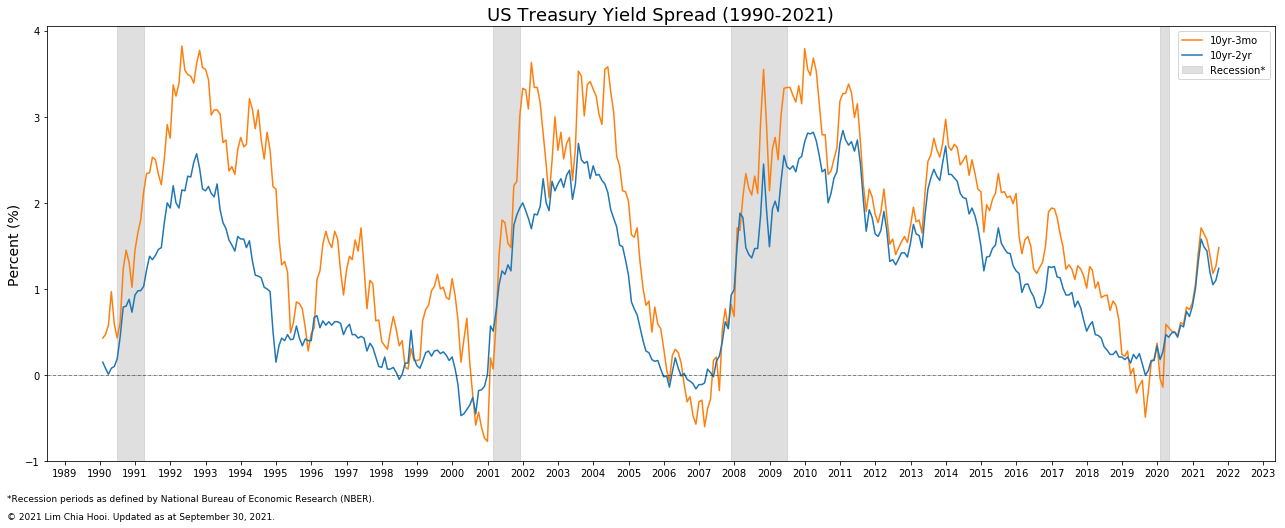

In [17]:
# plot the chart
fig, ax = plt.subplots(figsize=(22,8))
# plt.xlabel("Date")
plt.ylabel("Percent (%)", fontsize=14)
plt.plot(df_month["10yr-3mo"], label="10yr-3mo", color="#ff7f0e")
plt.plot(df_month["10yr-2yr"], label="10yr-2yr", color="#1f77b4")

# locate every year
years = mdates.YearLocator()   
# months = mdates.MonthLocator()  # every month

# define the date format
myFmt = mdates.DateFormatter("%Y") 

# tell matplotlib to use the format specified above
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt)

# plot a horizontal line at y=0
plt.axhline(y=0, color="black", linestyle="-.", linewidth=0.5)

# set the limit of y and x axis
# plt.ylim(-1, 4)
# plt.xlim([datetime.date(1989, 1, 1), datetime.date(2021, 1, 1)])

# plot recession periods
plt.axvspan(datetime.date(1990, 7, 1), datetime.date(1991, 3, 31), alpha=0.5, color='silver', label="Recession*")
plt.axvspan(datetime.date(2001, 3, 1), datetime.date(2001, 11, 30), alpha=0.5, color='silver')
plt.axvspan(datetime.date(2007, 12, 1), datetime.date(2009, 6, 30), alpha=0.5, color='silver')
plt.axvspan(datetime.date(2020, 2, 1), datetime.date(2020, 4, 30), alpha=0.5, color='silver')

# set title and fontsize
plt.title("US Treasury Yield Spread (1990-2021)", fontsize=18)

# add text as footnote
plt.figtext(0.1, 0.055, "*Recession periods as defined by National Bureau of Economic Research (NBER).", color="k", fontsize=9)
plt.figtext(0.1, 0.025, "© 2021 Lim Chia Hooi. Updated as at September 30, 2021.", color="k", fontsize=9)

# show legend
plt.legend()
# plt.grid()
plt.savefig("us_treasury_yield_spread.png")
plt.show()

In [18]:
# plot yield spread for 2019 and 2020 only
ys_2019 = len(df[df["Date"].dt.year >= 2019])
ys_2019

690

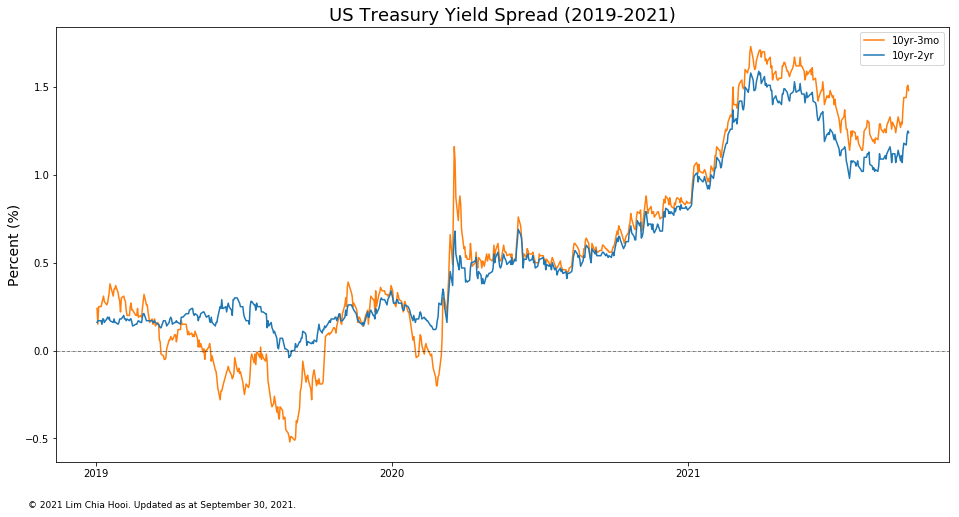

In [19]:
# plot the latest 2019 chart
fig, ax = plt.subplots(figsize=(16,8))
# plt.figure(figsize=(16,8))
# plt.xlabel("Date")
plt.ylabel("Percent (%)", fontsize=14)
plt.plot(df["10yr-3mo"][-ys_2019:], label="10yr-3mo", color="#ff7f0e")
plt.plot(df["10yr-2yr"][-ys_2019:], label="10yr-2yr", color="#1f77b4")

# locate every year
years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month

# define the date format
myFmt = mdates.DateFormatter("%Y")   # 2019
# myFmt = mdates.DateFormatter("%Y-%m")   # 2019-01

# tell matplotlib to use the format specified above
# ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(myFmt); 

# plot a horizontal line at y=0
plt.axhline(y=0, color="black", linestyle="-.", linewidth=0.5)

# set the limit of y and x axis
# plt.ylim(-0.2, 0.5)
# plt.xlim([datetime.date(2018, 12, 1), datetime.date(2019, 6, 1)])

# set title and fontsize
plt.title("US Treasury Yield Spread (2019-2021)", fontsize=18)

# add text as footnote
plt.figtext(0.1, 0.045, "© 2021 Lim Chia Hooi. Updated as at September 30, 2021.", color="k", fontsize=9)

# show legend
plt.legend()
# plt.grid()
plt.savefig("us_treasury_yield_spread_2019.png")
plt.show()

---
# <a name="conclusion">Discussion and Conclusion</a>
In this project, we have visualized the U.S. Treasury Yield Spread chart for two yield spreads i.e. 10yr-3mo and 10yr-2yr. From the first chart, we can see that inverted yield curves have preceded three of the previous recessions in 1990-1991, 2001, 2007-2009.
This shows that inverted yield curve is a strong predictor of economic recession and represents an accurate forecast of the turning points of the business cycle. 

Recently, the yield curve has briefly inverted in March 2019 with the longer term 10-year treasury bond having a lower yield than shorter term 3-month treasury bill, causing a negative yield curve. Fortunately, the 10yr-2yr yield spread is still in the positive territory. However, given past historical trend, it can be argued that the next U.S. economic recession could be just 12-24 months ahead. When the U.S. sneezes, the world catches a cold. Could the world economy be facing another major economic downturn soon? Only time will tell.


If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

---
## References
- https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
- https://www.investopedia.com/terms/y/yieldspread.asp
- https://www.investopedia.com/terms/i/invertedyieldcurve.asp
- https://fred.stlouisfed.org/series/T10Y2Y
- https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States
- https://www.seeitmarket.com/us-yield-curve-flashing-sell-signal-stocks-15681/